## Avengers Dataset

The avengers dataset contains a dataframe with superhero informations.
* The dataset is not clean and so we need to find irregularities and try to fix them

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
avengers = pd.read_csv("avengers.csv", encoding="iso-8859-1")
print(avengers.shape)
avengers.head(2)

(173, 21)


,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...


* There are columns with many null values.
* There are 173 rows (characters), and 21 columns with their characteristics

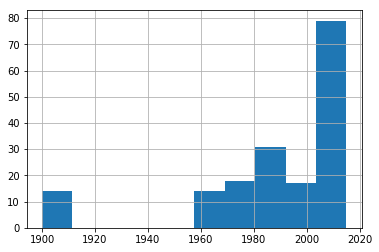

In [3]:
#Observing histrogram of Years when avengers were introduced
avengers["Year"].hist()

The histogram shows that about 14 avenger characters were added to the dataset with Data Added at 1900. This is wrong information because Marvel introduces the Avenger characters after 1960.
* Only avengers introduced after 1960 will be kept

In [4]:
#Contains filteres dataset, to only Avengers introduced after 1960
true_avengers = avengers[avengers["Year"]>1960]

## Joining Death columns together

Many of the columns in true_avengers are unnecessary. As an example, there are multiple columns that account for the number of deaths that teh character experienced.

In [5]:
#Finding columns that account for character deaths
columns = true_avengers.columns
death_cols = []
for i in list(columns):
    if i.startswith("D"):
        death_cols.append(i)
print(death_cols)

['Death1', 'Death2', 'Death3', 'Death4', 'Death5']


* We will combine all Death column data into 1 single column

In [6]:
#Column Death 1
true_avengers["Death1"].value_counts()

NO     91
YES    68
Name: Death1, dtype: int64

In [7]:
#Function takes in row by row
#For each row, it assigns 1 for each "YES" death column. 
def clean_deaths(row):
    num_deaths = 0
    for d in death_cols:
        death = row[d]
        if death == "YES":
            num_deaths += 1
    return num_deaths

In [8]:
#Creating new column that contains added Death values
true_avengers["Deaths"] = true_avengers.apply(clean_deaths, axis=1)   

/Users/kelvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now we want to count the amount of rows that indicate correct column "Years since joining", which is the difference of Year 2015 and Year column.

In [11]:
true_avengers[["Year", "Years since joining"]].head()

,Year,Years since joining
0,1963,52
1,1963,52
2,1963,52
3,1963,52
4,1963,52


In [29]:
joined_accuracy_count = int()
correct_joined_bbyears = true_avengers[true_avengers["Years since joining"]+true_avengers["Year"] == 2015]
joined_accuracy_count = len(correct_joined_years)

In [30]:
print("Amount of rows with correct Years since joining"joined_accuracy_count

159